# Iris Flower Classification

In [157]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score,RocCurveDisplay,roc_curve,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report


In [91]:
### Visualizing Charts ::

plt.rcParams['figure.figsize']=[15,6]

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
# Dataset 
df=sns.load_dataset('iris')

In [94]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [96]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory data analysis

In [97]:
# checking missing values

In [98]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [99]:
# No missing values

In [100]:
# checking data imbalance

In [101]:
df.species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

In [102]:
# Data is not imbalanced

#### Univariate analysis

<AxesSubplot:xlabel='species', ylabel='count'>

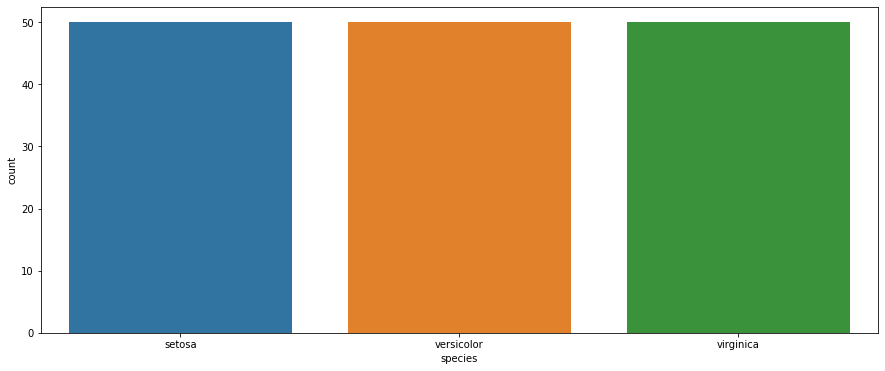

In [103]:
sns.countplot(df.species)

In [104]:
num=df.select_dtypes(include=np.number).columns
num

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

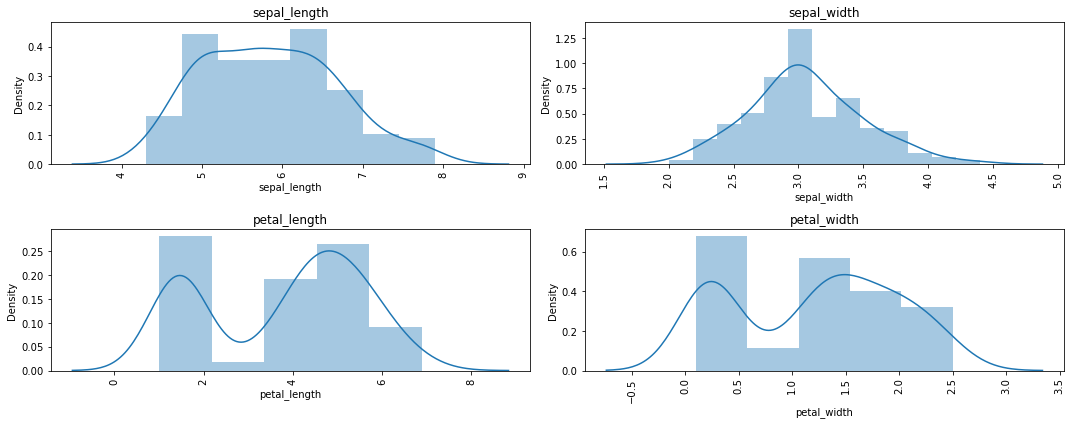

In [105]:
rows=2
columns=2
iterator=1

for i in num:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

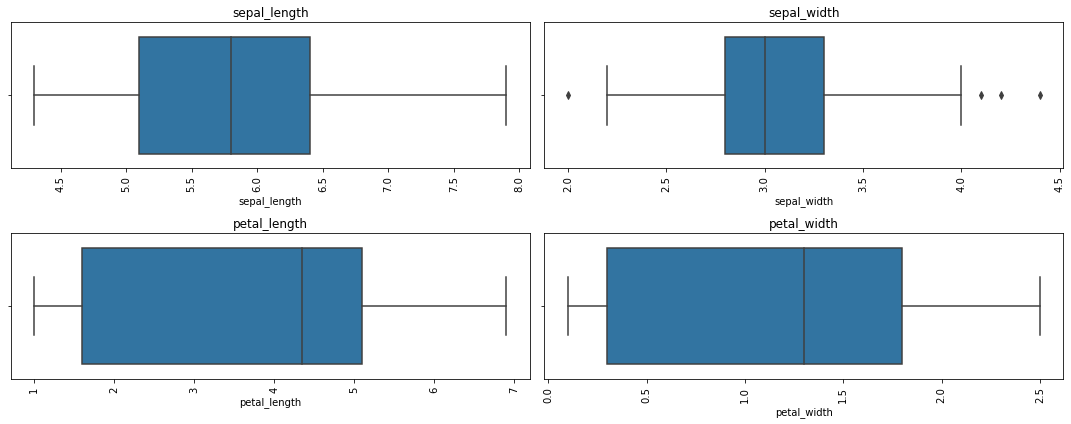

In [106]:
rows=2
columns=2
iterator=1

for i in num:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

In [107]:
# Outliers are present in sepal width column

#### Multivariate analysis

<AxesSubplot:>

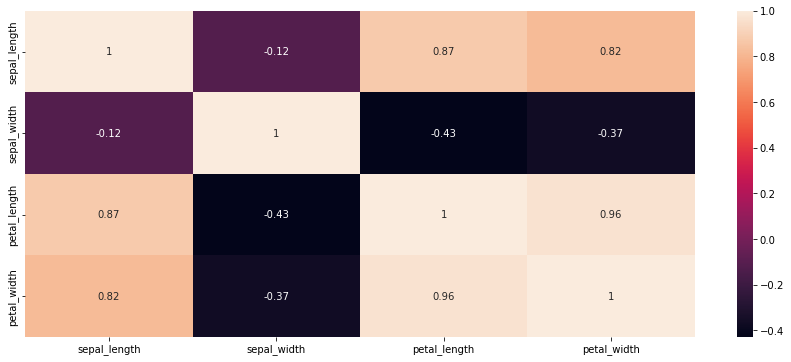

In [108]:
sns.heatmap(df.corr(), annot=True)

In [109]:
# petal width is highly correlated wirh sepal length as well as petal length
# petal length is highly correlated with sepal_length

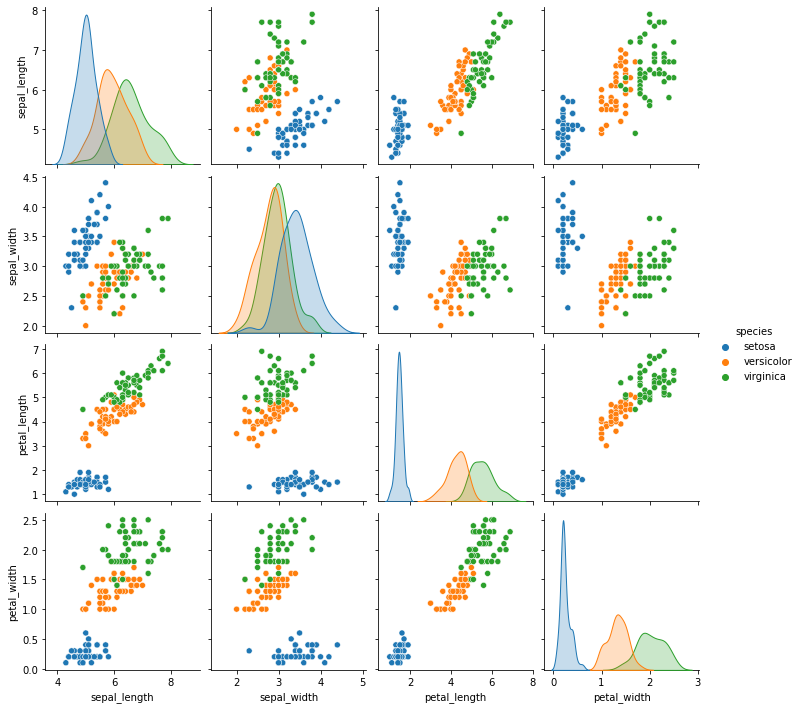

In [110]:
sns.pairplot(df , hue='species'  )

In [111]:
# checking  and treating outliers 

In [112]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [113]:
df.shape

(150, 5)

In [114]:
 df_trim = df[(~((df < lower_bound) | (df > upper_bound)).any(axis=1))]

In [115]:
df_trim.shape

(146, 5)

### Encoding

In [116]:
df_trim["species"].replace({"setosa":0 , "versicolor":1 , "virginica":2} , inplace = True)


In [117]:
df_trim.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Scaling

In [118]:
num

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [119]:
scale=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [120]:
ss=StandardScaler()

In [121]:
df_trim.loc[:,scale]=ss.fit_transform(pd.DataFrame(df_trim.loc[:,scale]))

In [122]:
df_trim.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.910515,1.159151,-1.373764,-1.348525,0
1,-1.151122,-0.101922,-1.373764,-1.348525,0
2,-1.391729,0.402507,-1.430841,-1.348525,0
3,-1.512032,0.150292,-1.316687,-1.348525,0
4,-1.030819,1.411365,-1.373764,-1.348525,0


### Train_Test_Split

In [123]:
x=df_trim.drop('species',axis=1)
y=df_trim['species']

In [124]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [125]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(116, 4)
(30, 4)
(116,)
(30,)


# Models

### DecisionTreeClassifier

In [126]:
tr=DecisionTreeClassifier()

In [127]:
tr.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [128]:
y_pred=tr.predict(xtest)

In [140]:
# Test_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [141]:
# Training Report
tr_train_pred = tr.predict(xtrain)
print(classification_report(ytrain, tr_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



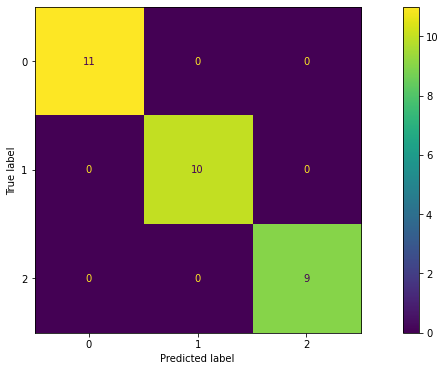

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)

#### Hyperparameter Tuning

In [142]:
# If we tune the hyperparameters in the decision tree

In [131]:
parameters={
     'criterion':['gini','entropy'],
     'max_depth':range(2,50),
    'min_samples_split': range(1,25)
     
}

In [132]:
cv=GridSearchCV(estimator=tr,param_grid=parameters,cv=10,verbose=1,scoring='accuracy')

In [133]:
dcv=cv.fit(xtrain,ytrain)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits


In [134]:
dcv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [135]:
tr1=DecisionTreeClassifier(criterion= 'gini',
                         max_depth=2,
                         min_samples_split=2,
                         random_state=0
                         )

In [136]:
model_fit=tr1.fit(xtrain,ytrain)

In [137]:
ytr_pred_hyp=model_fit.predict(xtest)
ytr_pred_hyp

array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2], dtype=int64)

In [138]:
# test report
class_report=classification_report(ytest,ytr_pred_hyp)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [139]:
# Training Report
trhy_train_pred = model_fit.predict(xtrain)
print(classification_report(ytrain, trhy_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.94        39
           2       0.97      0.90      0.94        41

    accuracy                           0.96       116
   macro avg       0.96      0.96      0.96       116
weighted avg       0.96      0.96      0.96       116



### RandomForestClassifier

In [150]:
rfc=RandomForestClassifier()

In [151]:
r=rfc.fit(xtrain,ytrain)

In [152]:
rfc_pred=r.predict(xtest)

In [153]:
class_report_rfc=classification_report(ytest,rfc_pred)
print(class_report_rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [154]:
# Training Report
rfc_train_pred = r.predict(xtrain)
print(classification_report(ytrain, rfc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



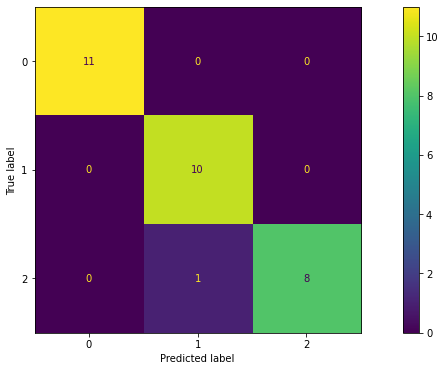

In [155]:
ConfusionMatrixDisplay.from_predictions(ytest,rfc_pred)

#### XGBClassifier

In [158]:
xg=XGBClassifier()

In [159]:
x1=xg.fit(xtrain,ytrain)


In [160]:
xg_pred=x1.predict(xtest)

In [161]:
# Test report
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [162]:
# Training Report
xg_train_pred = x1.predict(xtrain)
print(classification_report(ytrain, xg_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



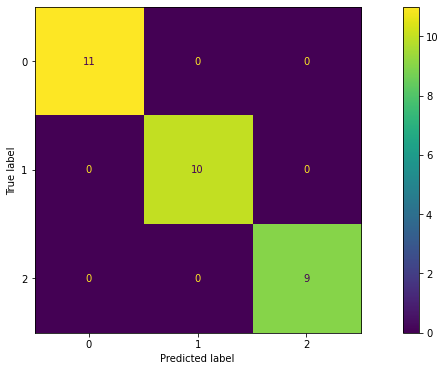

In [163]:
ConfusionMatrixDisplay.from_predictions(ytest,xg_pred)